Draw Decision Tree for below problem
# Let's assume we want to play badminton on a particular day
# — say Saturday — how will you decide whether to play or not

'''
Dataset:

day ,weather ,temperature ,humidity ,wind ,play

1, Sunny, hot, high, weak, NO <br />
2, Cloudy, hot, high, weak, yes  <br />
3, Sunny, mild, normal, strong, yes <br />
4, Cloudy, mild, high, strong, yes <br />
5, rainy, mild, high, strong, NO <br />
6, rainy, cool, normal, strong, NO <br />
7, rainy, mild, high, weak, yes <br />
8, sunny, hot, high, strong, no <br />
9, cloudy, hot, normal, weak, yes <br />
10, rainy, mild, high, strong, no <br />


'''


In [1]:
import csv

data = [
    [1, 'Sunny', 'hot', 'high', 'weak', 'NO'],
    [2, 'Cloudy', 'hot', 'high', 'weak', 'yes'],
    [3, 'Sunny', 'mild', 'normal', 'strong', 'yes'],
    [4, 'Cloudy', 'mild', 'high', 'strong', 'yes'],
    [5, 'rainy', 'mild', 'high', 'strong', 'NO'],
    [6, 'rainy', 'cool', 'normal', 'strong', 'NO'],
    [7, 'rainy', 'mild', 'high', 'weak', 'yes'],
    [8, 'sunny', 'hot', 'high', 'strong', 'no'],
    [9, 'cloudy', 'hot', 'normal', 'weak', 'yes'],
    [10, 'rainy', 'mild', 'high', 'strong', 'no']
]

with open('datasetnew.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['day', 'weather', 'temperature', 'humidity', 'wind', 'play'])
    csvwriter.writerows(data)

In [2]:
import pandas as pd
df = pd.read_csv('datasetnew.csv')
print(df)

   day weather temperature humidity    wind play
0    1   Sunny         hot     high    weak   NO
1    2  Cloudy         hot     high    weak  yes
2    3   Sunny        mild   normal  strong  yes
3    4  Cloudy        mild     high  strong  yes
4    5   rainy        mild     high  strong   NO
5    6   rainy        cool   normal  strong   NO
6    7   rainy        mild     high    weak  yes
7    8   sunny         hot     high  strong   no
8    9  cloudy         hot   normal    weak  yes
9   10   rainy        mild     high  strong   no


In [3]:
# Define notations for label encoding
notations = {
    'weather': {'Sunny': 1, 'Cloudy': 2, 'rainy': 3, 'sunny': 4, 'cloudy': 5},
    'temperature': {'hot': 1, 'mild': 2, 'cool': 3},
    'humidity': {'high': 1, 'normal': 2},
    'wind': {'weak': 1, 'strong': 2},
    'play': {'NO': 0, 'yes': 1, 'no': 0}
}

# label encoding using notations
df.replace(notations, inplace=True)
print(df)

   day  weather  temperature  humidity  wind  play
0    1        1            1         1     1     0
1    2        2            1         1     1     1
2    3        1            2         2     2     1
3    4        2            2         1     2     1
4    5        3            2         1     2     0
5    6        3            3         2     2     0
6    7        3            2         1     1     1
7    8        4            1         1     2     0
8    9        5            1         2     1     1
9   10        3            2         1     2     0


In [4]:
import pandas as pd
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score

# columns = ['day', 'weather', 'temperature', 'humidity', 'wind', 'play']

X = df.drop('play', axis=1)
X = df.drop('day', axis=1)
y = df['play']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train.values, y_train)

y_pred = clf.predict(X_test.values)

accuracy = (accuracy_score(y_test.values, y_pred) * 100)
print("Accuracy:", accuracy)

Accuracy: 100.0


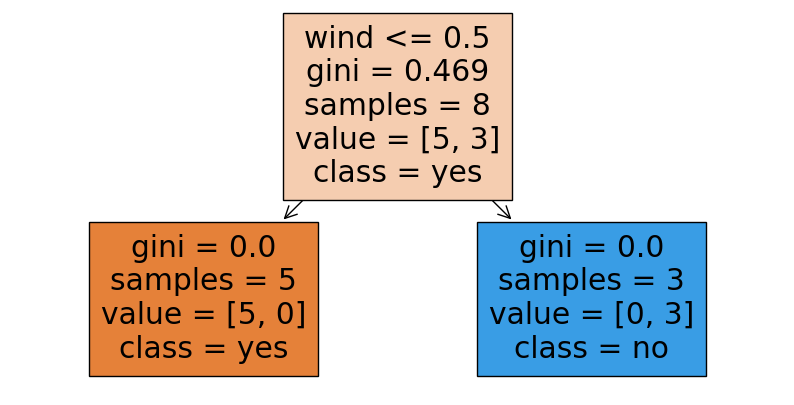

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

columns = ['day', 'weather', 'temperature', 'humidity', 'wind', 'play']
_target_names = ['yes','no']

# Plot the decision tree
plt.figure(figsize=(10, 5))
plot_tree(clf, filled=True, feature_names=columns, class_names=_target_names)
plt.show()

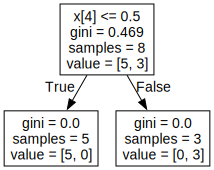

In [6]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None)

graph = graphviz.Source(dot_data)
graph